<a href="https://colab.research.google.com/github/HWatanuki/MatematicaAplicada/blob/main/DerivadasParciais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sympy
from google.colab import drive
from google.colab import files

In [ ]:
drive.mount ('/content/gdrive', force_remount = True)
dirRaiz = "/content/gdrive/My Drive/"
dirBase = dirRaiz + "Colab Notebooks/"

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv (dirBase+'FuncAula4.csv')
df


,Unnamed: 0,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8
0,-8,"-2,542930998","-0,1275371998","0,4377310878","-1,402944335","-3,829864975","-4,352027564","-2,160925479","1,045702204","2,547212724","1,045702204","-2,160925479","-4,352027564","-3,829864975","-1,402944335","0,4377310878","-0,1275371998","-2,542930998"
1,-7,"-2,209154843","0,2062389555","0,7715072431","-1,069168179","-3,496088819","-4,018251408","-1,827149324","1,379478359","2,88098888","1,379478359","-1,827149324","-4,018251408","-3,496088819","-1,069168179","0,7715072431","0,2062389555","-2,209154843"
2,-6,"-2,109958429","0,3054353692","0,8707036568","-0,9699717657","-3,396892406","-3,919054995","-1,72795291","1,478674773","2,980185293","1,478674773","-1,72795291","-3,919054995","-3,396892406","-0,9699717657","0,8707036568","0,3054353692","-2,109958429"
3,-5,"-2,408768768","0,006625030108","0,5718933177","-1,268782105","-3,695702745","-4,217865334","-2,026763249","1,179864434","2,681374954","1,179864434","-2,026763249","-4,217865334","-3,695702745","-1,268782105","0,5718933177","0,006625030108","-2,408768768"
4,-4,"-2,576081016","-0,1606872182","0,4045810694","-1,436094353","-3,863014993","-4,385177582","-2,194075498","1,012552186","2,514062706","1,012552186","-2,194075498","-4,385177582","-3,863014993","-1,436094353","0,4045810694","-0,1606872182","-2,576081016"
5,-3,"-2,720115036","0,4767319825","1,04200027","-0,7986751524","-3,225595792","-3,747758381","-1,556656297","1,649971386","3,151481907","1,649971386","-1,556656297","-3,747758381","-3,225595792","-0,7986751524","1,04200027","0,4767319825","-1,938661816"
6,-2,"-0,4256859471","1,989707851","2,554976139","0,714300716","-1,712619924","-2,234782513","-0,04368042858","3,162947255","4,664457775","3,162947255","-0,04368042858","-2,234782513","-1,712619924","0,714300716","2,554976139","1,989707851","-0,4256859471"
7,-1,"1,205323707","3,620717505","4,185985793","2,34531037","-0,08161026949","-0,6037728585","1,587329226","4,793956909","6,29546743","4,793956909","1,587329226","-0,6037728585","-0,08161026949","2,34531037","4,185985793","3,620717505","1,205323707"
8,0,"1,909856278","4,325250076","4,890518363","3,049842941","0,6229223009","0,1007597119","2,291861796","5,498489479",7,"5,498489479","2,291861796","0,1007597119","0,6229223009","3,049842941","4,890518363","4,325250076","1,909856278"
9,1,"1,205323707","3,620717505","4,185985793","2,34531037","-0,08161026949","-0,6037728585","1,587329226","4,793956909","6,29546743","4,793956909","1,587329226","-0,6037728585","-0,08161026949","2,34531037","4,185985793","3,620717505","1,205323707"


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
from sympy import symbols
from sympy import diff
from sympy import cos
from sympy import Lambda

In [ ]:
a, b = symbols('a b', real = True)
f = 3*cos(a) + cos(b) + cos(a/2) + 2 * cos(b/2) 

g = Lambda (a, diff(f,a))
h = Lambda ((a, b), f)

m = g(-np.pi)
i = h(-np.pi,-2)/(m*(-np.pi))
r = m*a + i

t = Lambda (a, r)


In [ ]:
Xr = np.arange (-10, 10, 0.25)
Yr = np.zeros(80)

Zr = [t(j) for j in Xr]


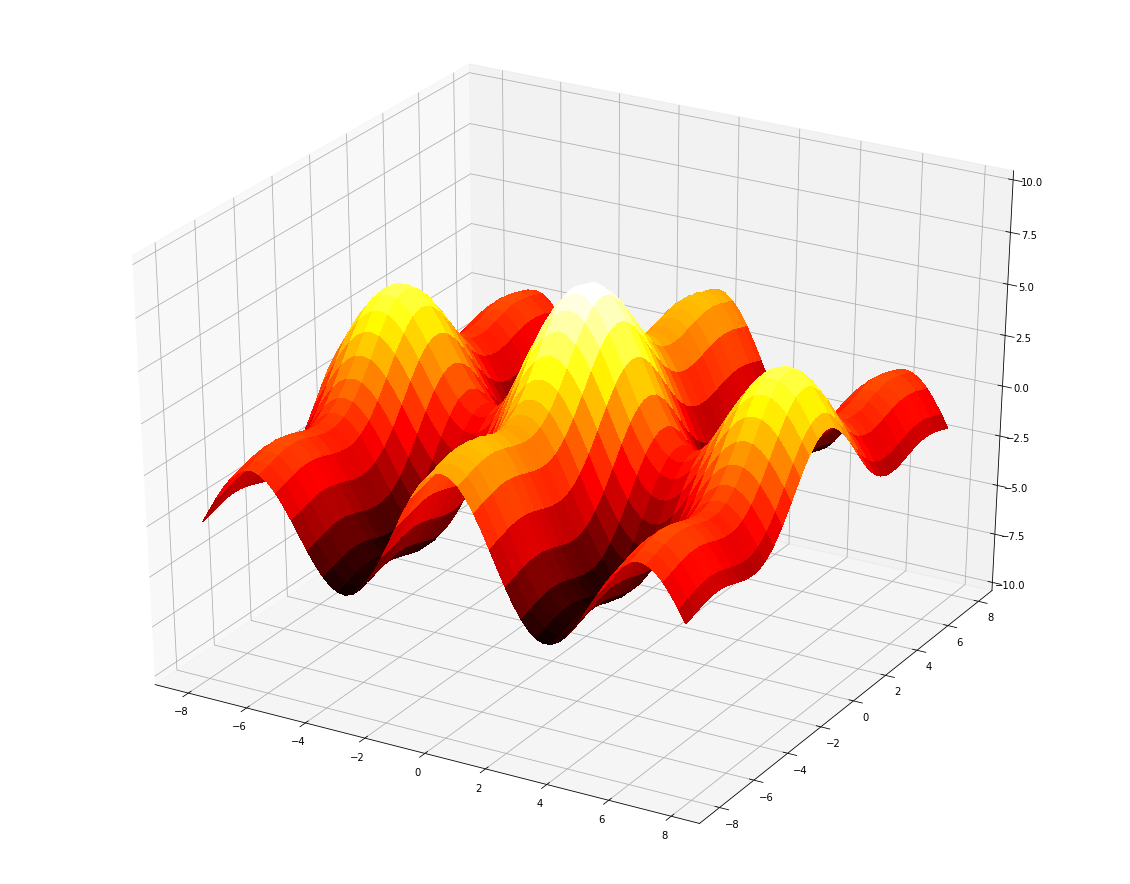

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.set_figheight(16)
fig.set_figwidth (20)

X = np.arange(-8, 8, 0.25)
Y = np.arange(-8, 8, 0.25)
X, Y = np.meshgrid(X, Y)
Z = 3*np.cos(X)+np.cos(Y)+np.cos(X/2)+2*np.cos(Y/2)

surf = ax.plot_surface(X, Y, Z, cmap=cm.hot, linewidth=0, antialiased=False)
ax.set_zlim(-10.01, 10.01)

plt.show()


